In [71]:
# Importation des bibliothèques utilisées pour cet exemple
import matplotlib.pyplot as plt
import numpy as np
import imageio.v3 as iio
import imageio
import skimage
from pygments.formatters import img

Profitons du fais que l'oeil humain a généralement moins de sensibilité à la couleur bleue pour créer une image mystère contenant une photo de chaton.

In [72]:
# Lecture d'un ficher image (utilisé l'image 1)
# Utilisez imageio.imread
img1 = iio.imread('image_00.jpg')

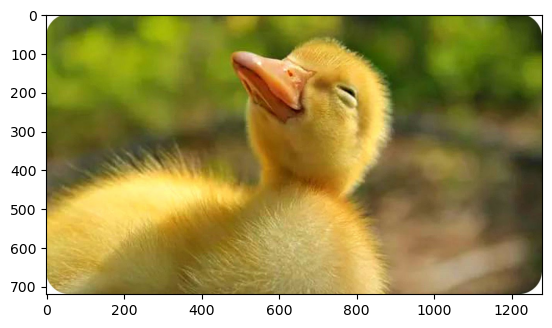

In [73]:
# Affichage d'une image : Utilisez matplotlib (plt.imshow() et plt.show())
plt.imshow(img1)
plt.show()

In [74]:
# Affichage de quelques informations au sujet de l'image (utilisez les attributes de la classe ndarray à laquelle appartient la variable img1)
print(img1.shape, img1.dtype)
print(img1[100,100])
print(img1[100][100])

(720, 1280, 3) uint8
[164 176  14]
[164 176  14]


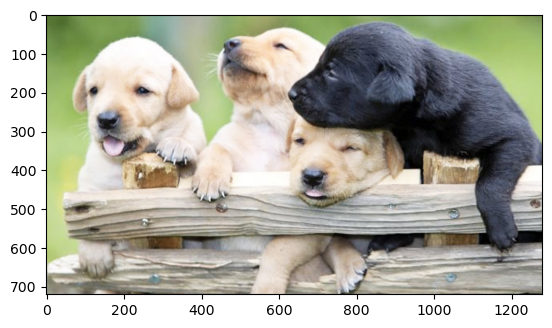

(720, 1280, 3) uint8


In [75]:
# Répéter pour les deux autres images
img2 = iio.imread('image_01.jpg')
plt.imshow(img2)
plt.show()
print(img2.shape, img2.dtype)


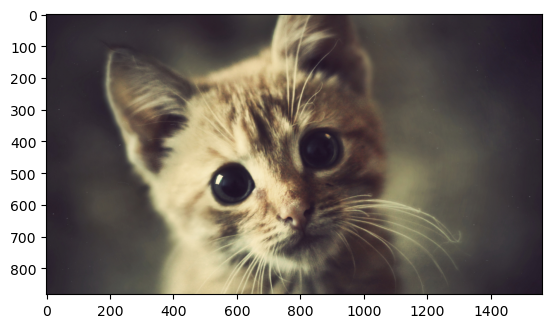

(882, 1563, 3) uint8


In [76]:
img3 = iio.imread('image_02.jpg')
plt.imshow(img3)
plt.show()
print(img3.shape, img3.dtype)


In [77]:
# Calculer la dimension minimale parmi les 3 images en X et en Y (utiliser la méthode .shape, et la fonction min)

xdim = min(img1.shape[0], img2.shape[0], img3.shape[0])
ydim = min(img1.shape[1], img2.shape[1], img3.shape[1])
print("x min :", xdim)
print("y min :", ydim)

x min : 720
y min : 1280


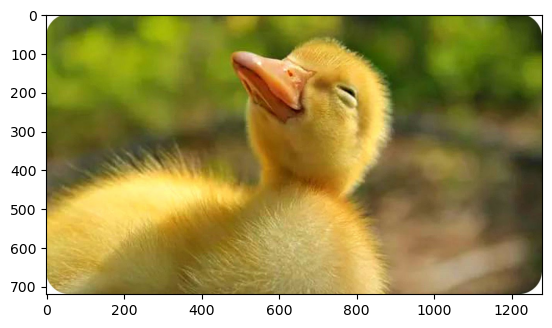

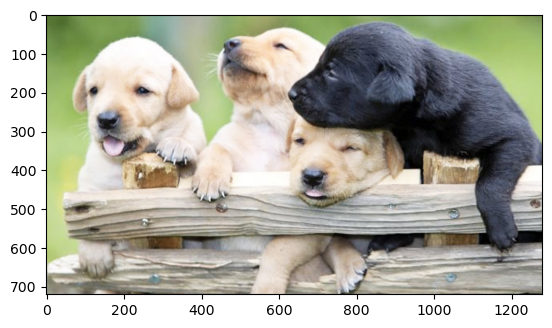

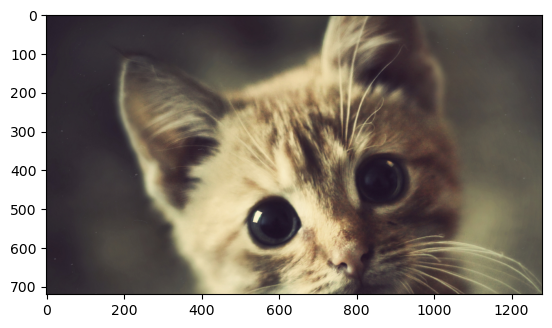

In [78]:
# Rogner les images selon la dimension calculée plus haut
imr1 = img1[0: xdim, 0: ydim]
plt.imshow(imr1)
plt.show()
imr2 = img2[0: xdim, 0: ydim]
plt.imshow(img2)
plt.show()
imr3 = img3[0: xdim, 0: ydim]
plt.imshow(imr3)
plt.show()

In [79]:
# Convertir les images RGB en niveau de gris (moyenner tous les canaux). Utiliser la méthode .mean et le bon axe
im1 = np.mean(imr1, axis=2)
im2 = np.mean(imr2, axis=2)
im3 = np.mean(imr3, axis=2)


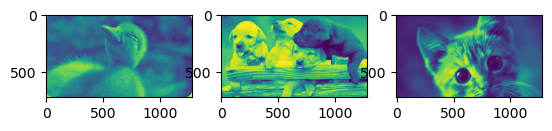

In [80]:
# Afficher les trois images dans une meme figure
# Note : utilisez plt.subplot
plt.subplot(1, 3, 1)
plt.imshow(im1)

plt.subplot(1, 3, 2)
plt.imshow(im2)

plt.subplot(1, 3, 3)
plt.imshow(im3)

plt.show()


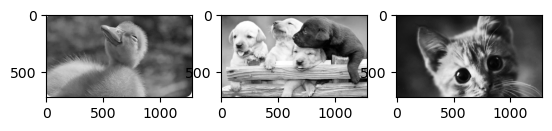

In [81]:
# Affichez les images en niveaux de gris (utilisez l'argument cmap='gray')
plt.subplot(1, 3, 1)
plt.imshow(im1, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(im2, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(im3, cmap='gray')
plt.show()


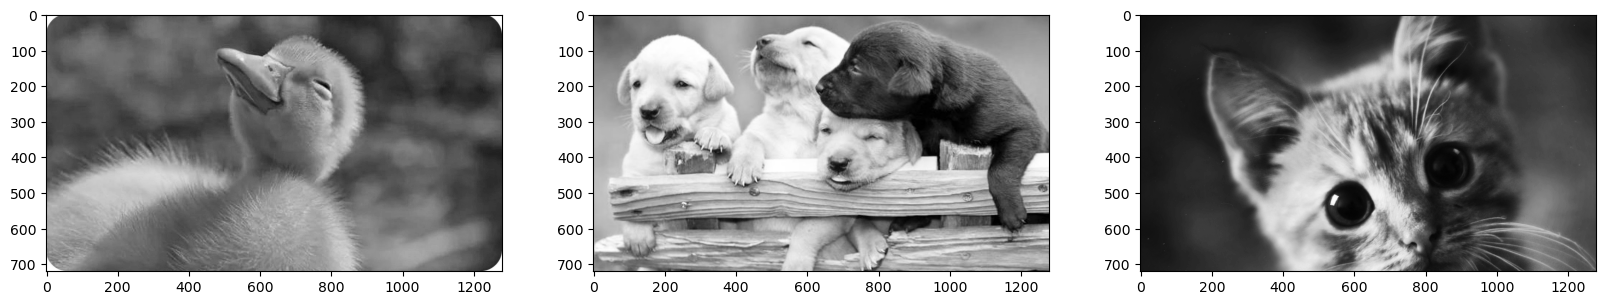

In [82]:
# Noramliser les intensités entre 0 et 1 pour les images 1 et 2, et entre 0 et 0.2 pour l'image 3.
# Utiliser: np.max
im1 = im1 / im1.max()
im2 = im2 / im2.max()
im3 = im3 * 0.2 / im3.max()

f, axarr = plt.subplots(1, 3, figsize=(20, 5))
axarr[0].imshow(im1, cmap='gray')
axarr[1].imshow(im2, cmap='gray')
axarr[2].imshow(im3, cmap='gray')
plt.show()

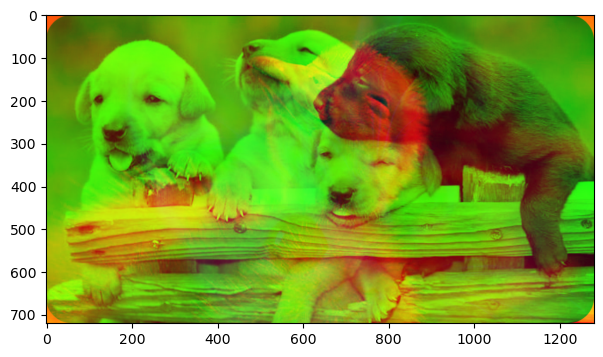

In [83]:
# Combiner les images (utilisé np.stack(..., axis=2)) pour créer 
montage = np.stack((im1, im2, im3), axis=2)
plt.figure(figsize=(20, 4))
plt.imshow(montage)
plt.show()

<Figure size 1500x500 with 0 Axes>

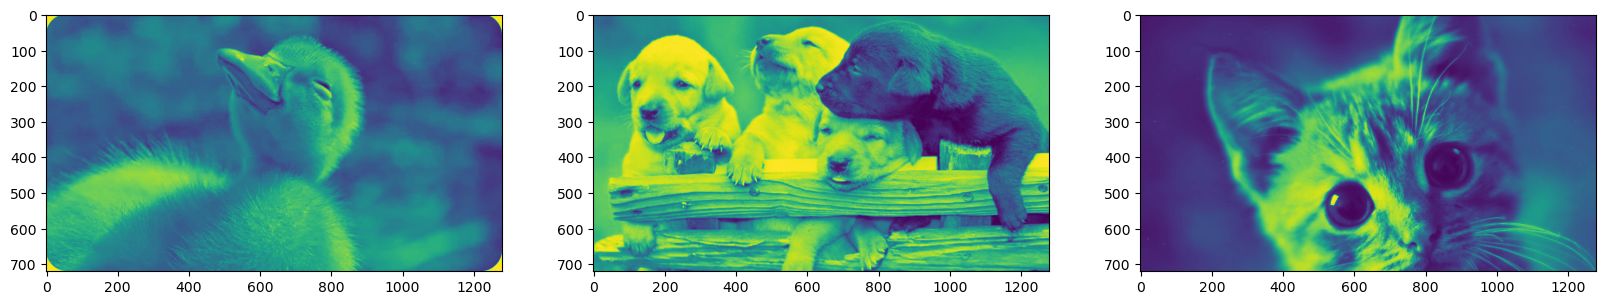

In [84]:
# Afficher les 3 canaux couleurs (indexation de l'axe 2)
plt.figure(figsize=(15, 5))
f, axarr = plt.subplots(1, 3, figsize=(20, 5))
axarr[0].imshow(montage[:,:,0])
axarr[1].imshow(montage[:,:,1])
axarr[2].imshow(montage[:,:,2])
plt.show()


In [67]:
# Entregistrer l'image mytère sur disque sous format jpg
'''
plt.imshow(montage)
plt.savefig('montage.jpg')
'''

print(montage.dtype)
imageio.imsave('montage.jpg', montage)

float64


TypeError: Cannot handle this data type: (1, 1, 3), <f8

uint8
0 255


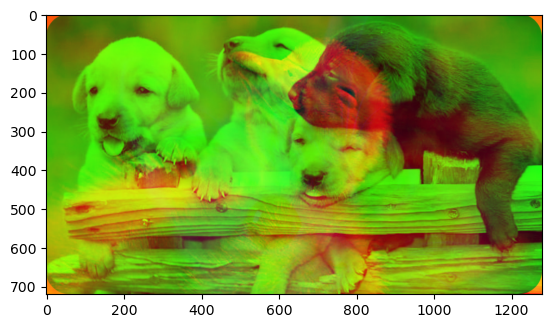

In [85]:
# Modifier le format des pixels de l'image ne plus recevoir l'avertissement précédent. 
# * Utiliser la méthode .astype() de la classe ndarray, et le format de donnée np.uint8.
# N'oublier pas d'ajuster l'étendue des valeurs pour éviter la saturation de votre image.
montage = montage * 255
montage = montage.astype(np.uint8)
print(montage.dtype)
print(montage.min(), montage.max())

plt.imshow(montage)
plt.show()
# Enregistrer cette image sous un autre nom
iio.imwrite('mystere.jpg', montage)

# Suggestion de modification
* Au lieu de rogner les images, utiliser les fonctions disponibles dans le module `skimage.transform` pour redimensionner les images avant de les combiner


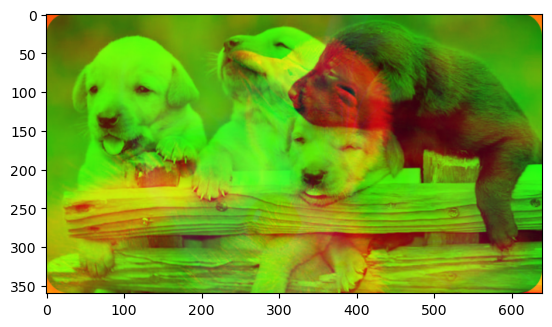

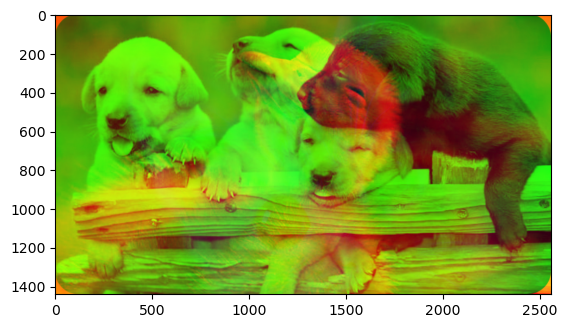

In [87]:
shape = np.array([montage.shape[0], montage.shape[1]])
shape = shape // 2

resized = skimage.transform.resize(montage, shape)
plt.imshow(resized)
plt.show()

shape = shape * 4
resized2 = skimage.transform.resize(montage, shape)
plt.imshow(resized2)
plt.show()
